In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy.stats as stats
from arch import arch_model
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

### 原始价格时间序列图

ADF统计量: -1.540436400008197
p值: 0.5134217108255927
临界值:
  1%: -3.432396452993246
  5%: -2.86244419883287
  10%: -2.567251325316284


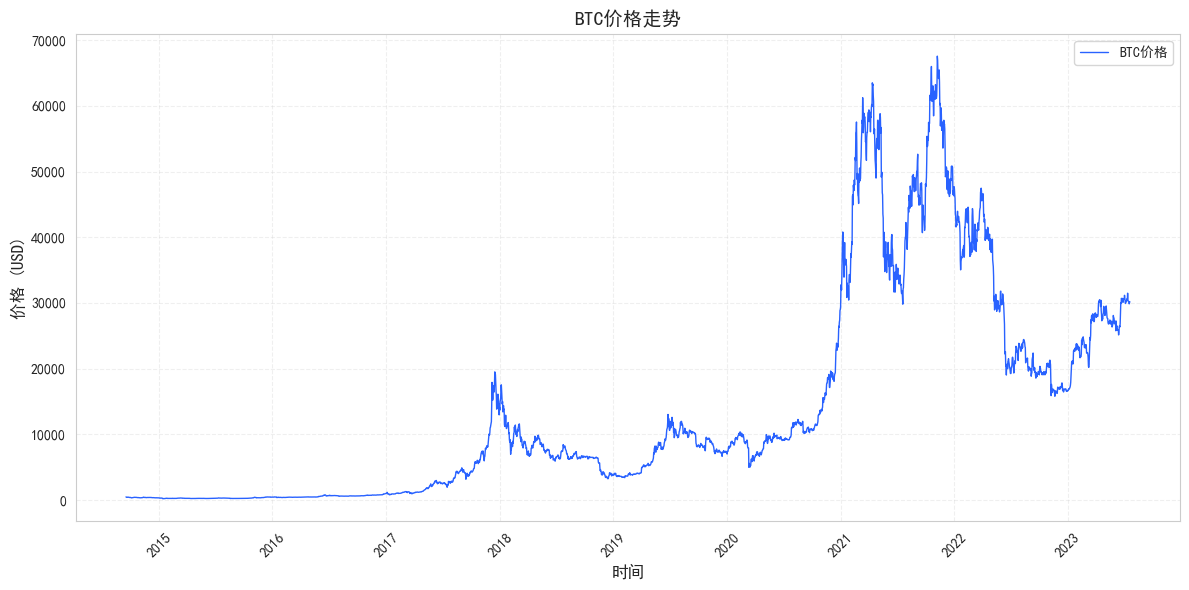

In [25]:
# 读取数据
df = pd.read_csv('data/BTC-USD.csv')
df['Date'] = pd.to_datetime(df['Date'])

# 进行ADF检验
adf_result = adfuller(df['Close'])
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

# 输出ADF检验结果
print("ADF统计量:", adf_statistic)
print("p值:", p_value)
print("临界值:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")

# 创建图形
plt.figure(figsize=(12, 6), facecolor='white')
# 绘制价格线
plt.plot(df['Date'], df['Close'], color='#2962FF', linewidth=1, label='BTC价格')
# 设置标题和标签
plt.title('BTC价格走势', fontsize=14)
plt.xlabel('时间', fontsize=12)
plt.ylabel('价格 (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('img/BTC价格原始时间序列.png')
plt.show()


In [26]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3228,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3.228000e+03
mean,2019-02-16 12:00:26.765799424,13664.725548,13997.728538,13300.725867,13672.568197,13672.568197,1.656613e+10
min,2014-09-17 00:00:00,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,2016-12-01 18:00:00,762.625244,773.658493,750.296265,764.113251,764.113251,1.304910e+08
50%,2019-02-16 12:00:00,7688.712403,7915.482666,7511.864746,7697.924072,7697.924072,1.019161e+10
75%,2021-05-03 06:00:00,20282.866699,20754.581543,19902.022949,20297.028808,20297.028808,2.742777e+10
max,2023-07-20 00:00:00,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11
std,NaN,16018.010041,16418.141665,15561.618968,16015.763332,16015.763332,1.949084e+10


### 对数时间序列图

ADF统计量: -0.9070918212007737
p值: 0.7856280083914896
临界值:
  1%: -3.432378047525015
  5%: -2.862436069383185
  10%: -2.5672469973560355


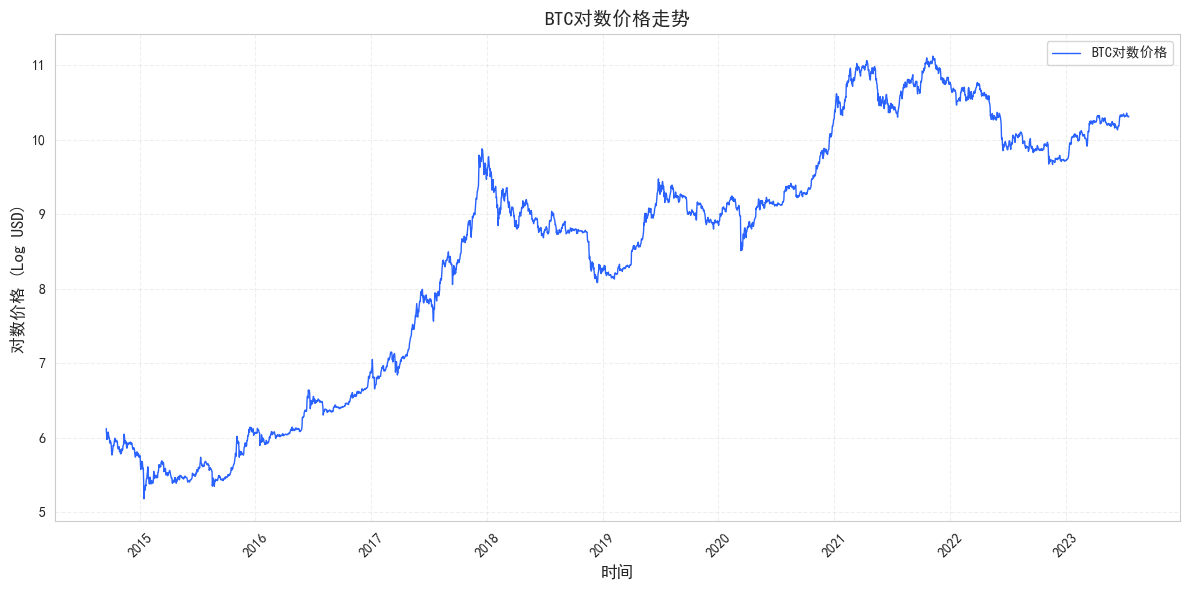

In [27]:
# 读取数据
df = pd.read_csv('data/BTC-USD.csv')
df['Date'] = pd.to_datetime(df['Date'])

# 对价格取对数
df['Log_Close'] = np.log(df['Close'])

# 进行ADF检验
adf_result = adfuller(df['Log_Close'])
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

# 输出ADF检验结果
print("ADF统计量:", adf_statistic)
print("p值:", p_value)
print("临界值:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")

# 创建图形
plt.figure(figsize=(12, 6), facecolor='white')
# 绘制对数价格线
plt.plot(df['Date'], df['Log_Close'], color='#2962FF', linewidth=1, label='BTC对数价格')
# 设置标题和标签
plt.title('BTC对数价格走势', fontsize=14)
plt.xlabel('时间', fontsize=12)
plt.ylabel('对数价格 (Log USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('img/BTC对数价格时间序列.png')
plt.show()

In [28]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Log_Close
count,3228,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3.228000e+03,3228.000000
mean,2019-02-16 12:00:26.765799424,13664.725548,13997.728538,13300.725867,13672.568197,13672.568197,1.656613e+10,8.483919
min,2014-09-17 00:00:00,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06,5.182362
25%,2016-12-01 18:00:00,762.625244,773.658493,750.296265,764.113251,764.113251,1.304910e+08,6.638716
50%,2019-02-16 12:00:00,7688.712403,7915.482666,7511.864746,7697.924072,7697.924072,1.019161e+10,8.948705
75%,2021-05-03 06:00:00,20282.866699,20754.581543,19902.022949,20297.028808,20297.028808,2.742777e+10,9.918230
max,2023-07-20 00:00:00,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11,11.120872
std,NaN,16018.010041,16418.141665,15561.618968,16015.763332,16015.763332,1.949084e+10,1.752911


无论原始价格序列差分与否，从p值判断（都大于0.05），所以都能得出，该序列绝对不平稳，所以需要进行差分处理。
我采取对原始时间序列进行差分，然后对白噪声进行检验

ADF Statistic: -9.515779426095047
p-value: 3.160120153308401e-16
Critical Values:
   1%: -3.432396452993246
   5%: -2.86244419883287
   10%: -2.567251325316284


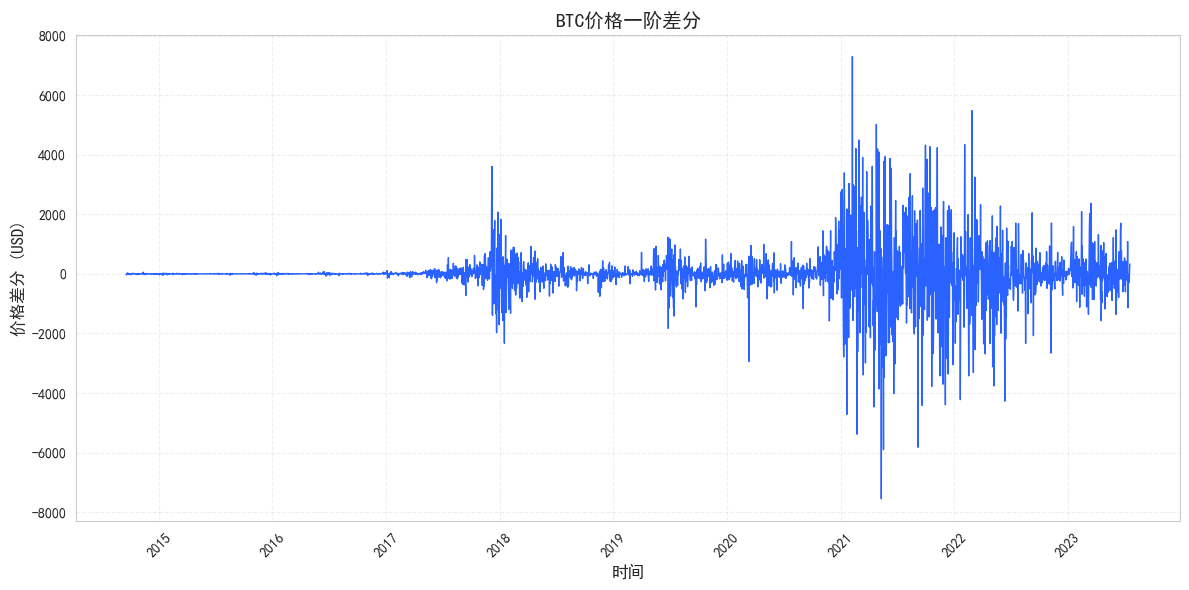

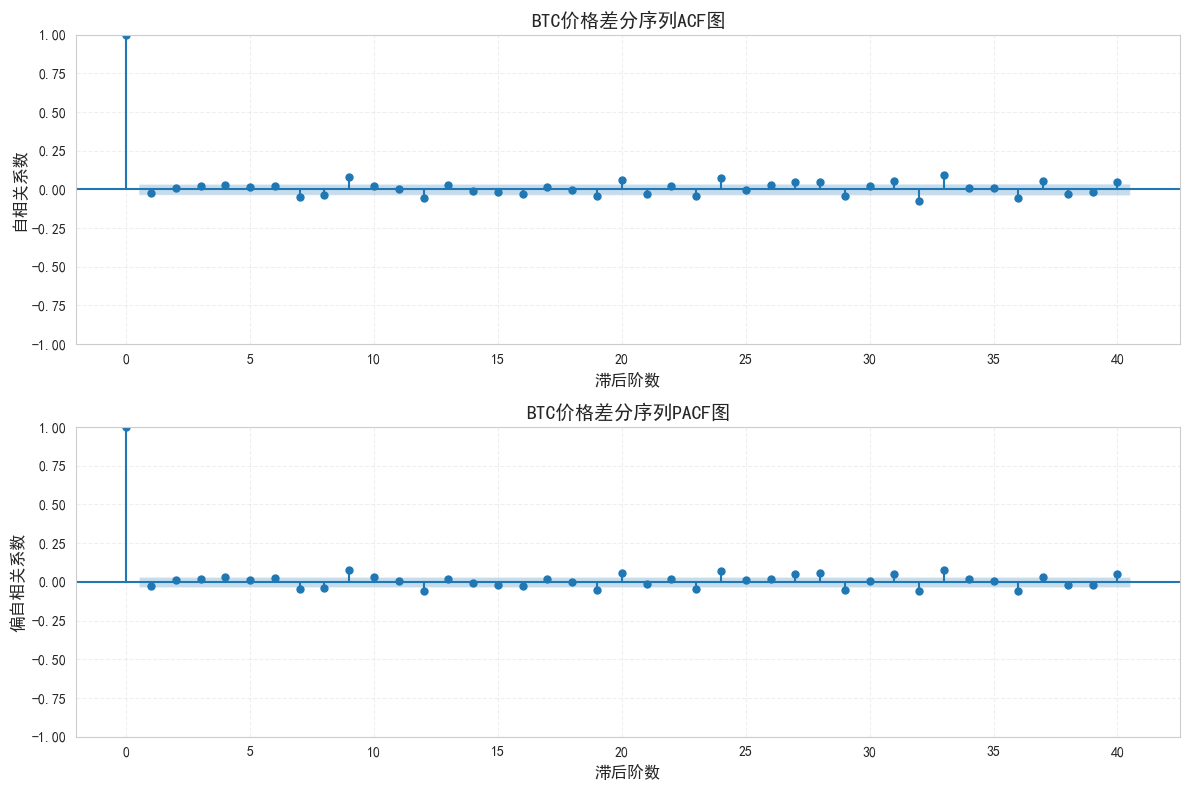

In [29]:
# 进行一阶差分
df['diff_price'] = df['Close'].diff()


# ADF检验，包含截距项
adf_result = adfuller(df['diff_price'].dropna(), regression='c')

# 打印ADF检验结果
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

# 绘制差分后的图
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['diff_price'], color='#2962FF', linewidth=1)
plt.title('BTC价格一阶差分', fontsize=14)
plt.xlabel('时间', fontsize=12)
plt.ylabel('价格差分 (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('img/BTC价格一阶差分.png')
plt.show()

# 创建子图展示ACF和PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# 绘制ACF图
plot_acf(df['diff_price'].dropna(), lags=40, alpha=0.05, ax=ax1)
ax1.set_title('BTC价格差分序列ACF图', fontsize=14)
ax1.set_xlabel('滞后阶数', fontsize=12)
ax1.set_ylabel('自相关系数', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.3)

# 绘制PACF图
plot_pacf(df['diff_price'].dropna(), lags=40, alpha=0.05, ax=ax2)
ax2.set_title('BTC价格差分序列PACF图', fontsize=14)
ax2.set_xlabel('滞后阶数', fontsize=12)
ax2.set_ylabel('偏自相关系数', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.3)

# 调整子图间距
plt.tight_layout()

# 保存图片
plt.savefig('img/BTC价格差分ACF_PACF图.png')
plt.show()

### 白噪声检验

In [30]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# 进行LB检验
lb_test = acorr_ljungbox(df['diff_price'].dropna(), lags=[5 ,10, 15, 20, 30], return_df=True)

# 打印检验结果
print("Ljung-Box白噪声检验结果：")
print("=" * 50)
print(lb_test)
print("\n检验结论：")
for idx, p_value in enumerate(lb_test['lb_pvalue']):
    lag = lb_test.index[idx]
    if p_value < 0.05:
        print(f"滞后{lag}阶：p值为{p_value:.4f} < 0.05，拒绝原假设，序列不是白噪声")
    else:
        print(f"滞后{lag}阶：p值为{p_value:.4f} > 0.05，不能拒绝原假设，序列可能是白噪声")

Ljung-Box白噪声检验结果：
       lb_stat     lb_pvalue
5     7.007393  2.200910e-01
10   44.079144  3.185648e-06
15   57.500986  6.746410e-07
20   78.631713  6.693740e-09
30  131.330756  1.219435e-14

检验结论：
滞后5阶：p值为0.2201 > 0.05，不能拒绝原假设，序列可能是白噪声
滞后10阶：p值为0.0000 < 0.05，拒绝原假设，序列不是白噪声
滞后15阶：p值为0.0000 < 0.05，拒绝原假设，序列不是白噪声
滞后20阶：p值为0.0000 < 0.05，拒绝原假设，序列不是白噪声
滞后30阶：p值为0.0000 < 0.05，拒绝原假设，序列不是白噪声


#### 发现白噪声检验结果表明，差分序列在滞后10阶以及更多阶的情况下，不是白噪声。

### 接下来进行模型构建与残差处理

#### ARIMA部分

开始ARIMA模型分析...
计算ESACF表...

ESACF表 (x: 显著相关, o: 不显著相关)
   MA阶数
AR     0   1   2   3   4   5   6   7   8   9  10  11  12
阶  ----------------------------------------------------
 0 |x   x   x   x   x   x   x   x   x   x   x   x   x   
 1 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 2 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 3 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 4 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 5 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 6 |o   o   o   o   o   o   x   x   x   o   o   x   o   
 7 |o   o   o   o   o   o   x   x   x   o   o   x   o   

建议的ARIMA阶数:
ARIMA(1, 1, 0)
ARIMA(1, 1, 1)
ARIMA(1, 1, 2)
ARIMA(1, 1, 3)
ARIMA(1, 1, 4)

评估建议的模型...

ARIMA(1, 1, 0):
AIC: 52183.09
BIC: 52195.25
参数显著: 是

ARIMA(1, 1, 1):
AIC: 52185.01
BIC: 52203.25
参数显著: 否

ARIMA(1, 1, 2):
AIC: 52183.85
BIC: 52208.17
参数显著: 是

ARIMA(1, 1, 3):
AIC: 52184.83
BIC: 52215.23
参数显著: 否

ARIMA(1, 1, 4):
AIC: 52186.26
BIC: 52222.73
参数显著: 否

最优

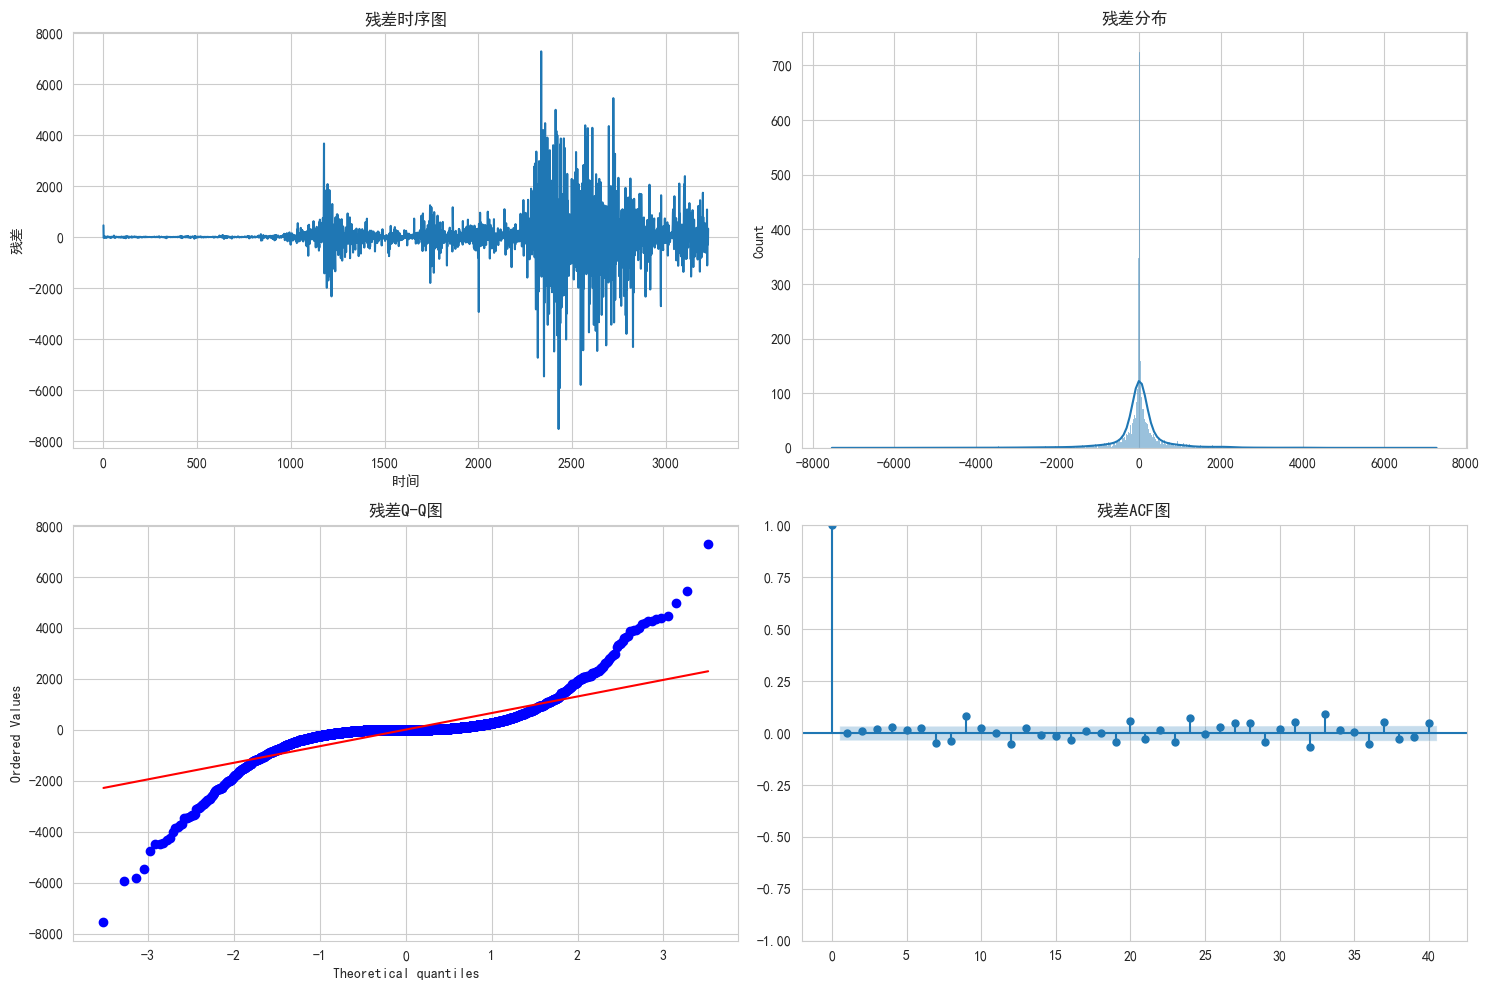


异方差性检验:
White检验p值: nan

ARCH效应检验:
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3507      0.293      1.195      0.232 [ -0.224,  0.926]

正态性检验:
Jarque-Bera检验p值: 0.0000
Shapiro-Wilk检验p值: 0.0000

检测到非正态性，使用Box-Cox转换...

Box-Cox转换使用的lambda值: 1.3090


In [31]:
# 模型构建与残差处理
# 导入自定义的分析器类
from ARIMAAnalyzerWithESACF import ARIMAAnalyzerWithESACF
from ResidualAnalyzer import ResidualAnalyzer
from statsmodels.tsa.arima.model import ARIMA

# 1. ARIMA分析
print("开始ARIMA模型分析...")
arima_analyzer = ARIMAAnalyzerWithESACF()
ESACF_matrix = arima_analyzer.compute_ESACF(df['Close'])
arima_analyzer.print_ESACF_table(ESACF_matrix)
suggested_orders = arima_analyzer.suggest_orders(ESACF_matrix)

print("\n建议的ARIMA阶数:")
for order in suggested_orders:
    print(f"ARIMA{order}")

# 2. 拟合最优模型
best_model = None
best_aic = float('inf')
best_params = None

print("\n评估建议的模型...")
for order in suggested_orders:
    try:
        # 拟合模型
        model = ARIMA(df['Close'], order=order)
        results = model.fit()

        # 检查参数显著性
        significant = all(p_value < 0.05 for p_value in results.pvalues)

        print(f"\nARIMA{order}:")
        print(f"AIC: {results.aic:.2f}")
        print(f"BIC: {results.bic:.2f}")
        print(f"参数显著: {'是' if significant else '否'}")

        if results.aic < best_aic and significant:
            best_aic = results.aic
            best_model = results
            best_params = order

    except Exception as e:
        print(f"ARIMA{order} 拟合失败: {str(e)}")
        continue

if best_model is not None:
    print("\n最优模型:")
    print(f"ARIMA{best_params}")
    print(best_model.summary())

    # 3. 残差分析
    print("\n开始残差分析...")
    resid_analyzer = ResidualAnalyzer(best_model, df['Close'])

    # 绘制残差诊断图
    resid_analyzer.plot_residual_diagnostics()

    # 检查异方差性和正态性
    has_heteroskedasticity = resid_analyzer.check_heteroskedasticity()
    non_normal = resid_analyzer.check_normality()

    # 处理残差（如果需要）
    if has_heteroskedasticity:
        print("\n检测到异方差性，使用GARCH模型处理...")
        standardized_resid = resid_analyzer.apply_garch()

    if non_normal:
        print("\n检测到非正态性，使用Box-Cox转换...")
        transformed_resid = resid_analyzer.box_cox_transform()
else:
    print("未找到合适的模型")

#### SARIMA

In [32]:
# SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import pandas as pd
import itertools

# 定义季节性周期
seasonal_periods = [14, 30]  # 周、双周、月度

# 定义SARIMA参数范围
p = d = q = range(0, 2)
P = D = Q = range(0, 2)

best_model = None
best_aic = np.inf
best_params = None
best_season = None

print("开始SARIMA模型选择...")
print("季节性周期: 14天(双周)、30天(月)")

# 对每个季节性周期进行网格搜索
for s in seasonal_periods:
    print(f"\n测试季节性周期 {s} 天...")

    # 创建参数组合
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = list(itertools.product(P, D, Q))

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                # 构建完整的季节性参数
                seasonal_order = param_seasonal + (s,)

                # 拟合模型
                model = SARIMAX(df['Close'],
                                order=param,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

                results = model.fit(disp=False)

                # 检查参数显著性
                significant = all(p_value < 0.05 for p_value in results.pvalues)

                if results.aic < best_aic and significant:
                    best_aic = results.aic
                    best_model = results
                    best_params = param
                    best_season = seasonal_order

                print(f'SARIMA{param}x{seasonal_order} - AIC:{results.aic:.2f}, 参数显著:{significant}')

            except Exception as e:
                continue

if best_model is not None:
    print('\n最优SARIMA模型:')
    print(f'SARIMA{best_params}x{best_season}')
    print('\n模型摘要:')
    print(best_model.summary())

    # 残差分析
    resid = best_model.resid

    # 1. 绘制残差诊断图
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    # 残差时序图
    ax1.plot(resid)
    ax1.set_title('残差时序图')

    # 残差直方图
    sns.histplot(resid, kde=True, ax=ax2)
    ax2.set_title('残差分布')

    # Q-Q图
    stats.probplot(resid, dist="norm", plot=ax3)
    ax3.set_title('残差Q-Q图')

    # ACF图
    plot_acf(resid, ax=ax4, lags=40)
    ax4.set_title('残差ACF图')

    plt.tight_layout()
    plt.savefig('img/ARIMA残差分析.png')
    plt.show()

    # 2. 进行诊断检验
    print('\n残差诊断检验:')

    # Ljung-Box检验
    lb_test = acorr_ljungbox(resid, lags=[10, 15, 20, 30])
    print("\nLjung-Box检验:")
    print(lb_test)

    # Jarque-Bera检验
    jb_test = stats.jarque_bera(resid)
    print(f"\nJarque-Bera检验 p值: {jb_test[1]:.4f}")

    # ARCH效应检验
    arch_model_test = arch_model(resid)
    arch_result = arch_model_test.fit(disp='off')
    print("\nARCH效应检验:")
    print(arch_result.summary().tables[1])

    # 3. 模型预测
    forecast = best_model.get_forecast(steps=30)
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    # 绘制预测结果
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[-100:], df['Close'][-100:], label='历史数据')
    plt.plot(forecast_mean.index, forecast_mean, label='预测值', color='red')
    plt.fill_between(forecast_ci.index,
                     forecast_ci.iloc[:, 0],
                     forecast_ci.iloc[:, 1],
                     color='r', alpha=0.1)
    plt.title('SARIMA模型30天预测')
    plt.xlabel('日期')
    plt.ylabel('价格')
    plt.legend()
    plt.grid(True)
    plt.savefig('img/SARIMA预测结果.png')
    plt.show()

# 如果残差仍然存在ARCH效应，我们可以继续添加GARCH处理
if best_model is not None and arch_result.pvalues[-1] < 0.05:
    print("\n检测到ARCH效应，建议继续使用GARCH族模型处理波动率...")

开始SARIMA模型选择...
季节性周期: 14天(双周)、30天(月)

测试季节性周期 14 天...
SARIMA(0, 0, 0)x(0, 0, 0, 14) - AIC:73410.08, 参数显著:True
SARIMA(0, 0, 0)x(0, 0, 1, 14) - AIC:70925.20, 参数显著:True
SARIMA(0, 0, 0)x(0, 1, 0, 14) - AIC:60662.34, 参数显著:True
SARIMA(0, 0, 0)x(0, 1, 1, 14) - AIC:60414.05, 参数显著:False
SARIMA(0, 0, 0)x(1, 0, 0, 14) - AIC:60676.75, 参数显著:True
SARIMA(0, 0, 0)x(1, 0, 1, 14) - AIC:60660.91, 参数显著:False
SARIMA(0, 0, 0)x(1, 1, 0, 14) - AIC:60431.83, 参数显著:False
SARIMA(0, 0, 0)x(1, 1, 1, 14) - AIC:60389.16, 参数显著:True
SARIMA(0, 0, 1)x(0, 0, 0, 14) - AIC:71013.79, 参数显著:True
SARIMA(0, 0, 1)x(0, 0, 1, 14) - AIC:70146.42, 参数显著:True
SARIMA(0, 0, 1)x(0, 1, 0, 14) - AIC:57734.89, 参数显著:True
SARIMA(0, 0, 1)x(0, 1, 1, 14) - AIC:57458.74, 参数显著:True
SARIMA(0, 0, 1)x(1, 0, 0, 14) - AIC:57761.26, 参数显著:True
SARIMA(0, 0, 1)x(1, 0, 1, 14) - AIC:69888.39, 参数显著:False
SARIMA(0, 0, 1)x(1, 1, 0, 14) - AIC:57482.98, 参数显著:True
SARIMA(0, 0, 1)x(1, 1, 1, 14) - AIC:57432.58, 参数显著:True
SARIMA(0, 1, 0)x(0, 0, 0, 14) - AIC:52167.99,


KeyboardInterrupt



加载数据...

使用混合模型进行预测...
Using device: cpu
训练LSTM模型...
Epoch [10/100], Loss: 0.000652
Epoch [20/100], Loss: 0.000454
Epoch [30/100], Loss: 0.000310
Epoch [40/100], Loss: 0.000315
Epoch [50/100], Loss: 0.000309
Epoch [60/100], Loss: 0.000266
Epoch [70/100], Loss: 0.000268
Epoch [80/100], Loss: 0.000216
Epoch [90/100], Loss: 0.000214
Epoch [100/100], Loss: 0.000231

拟合EGARCH模型...


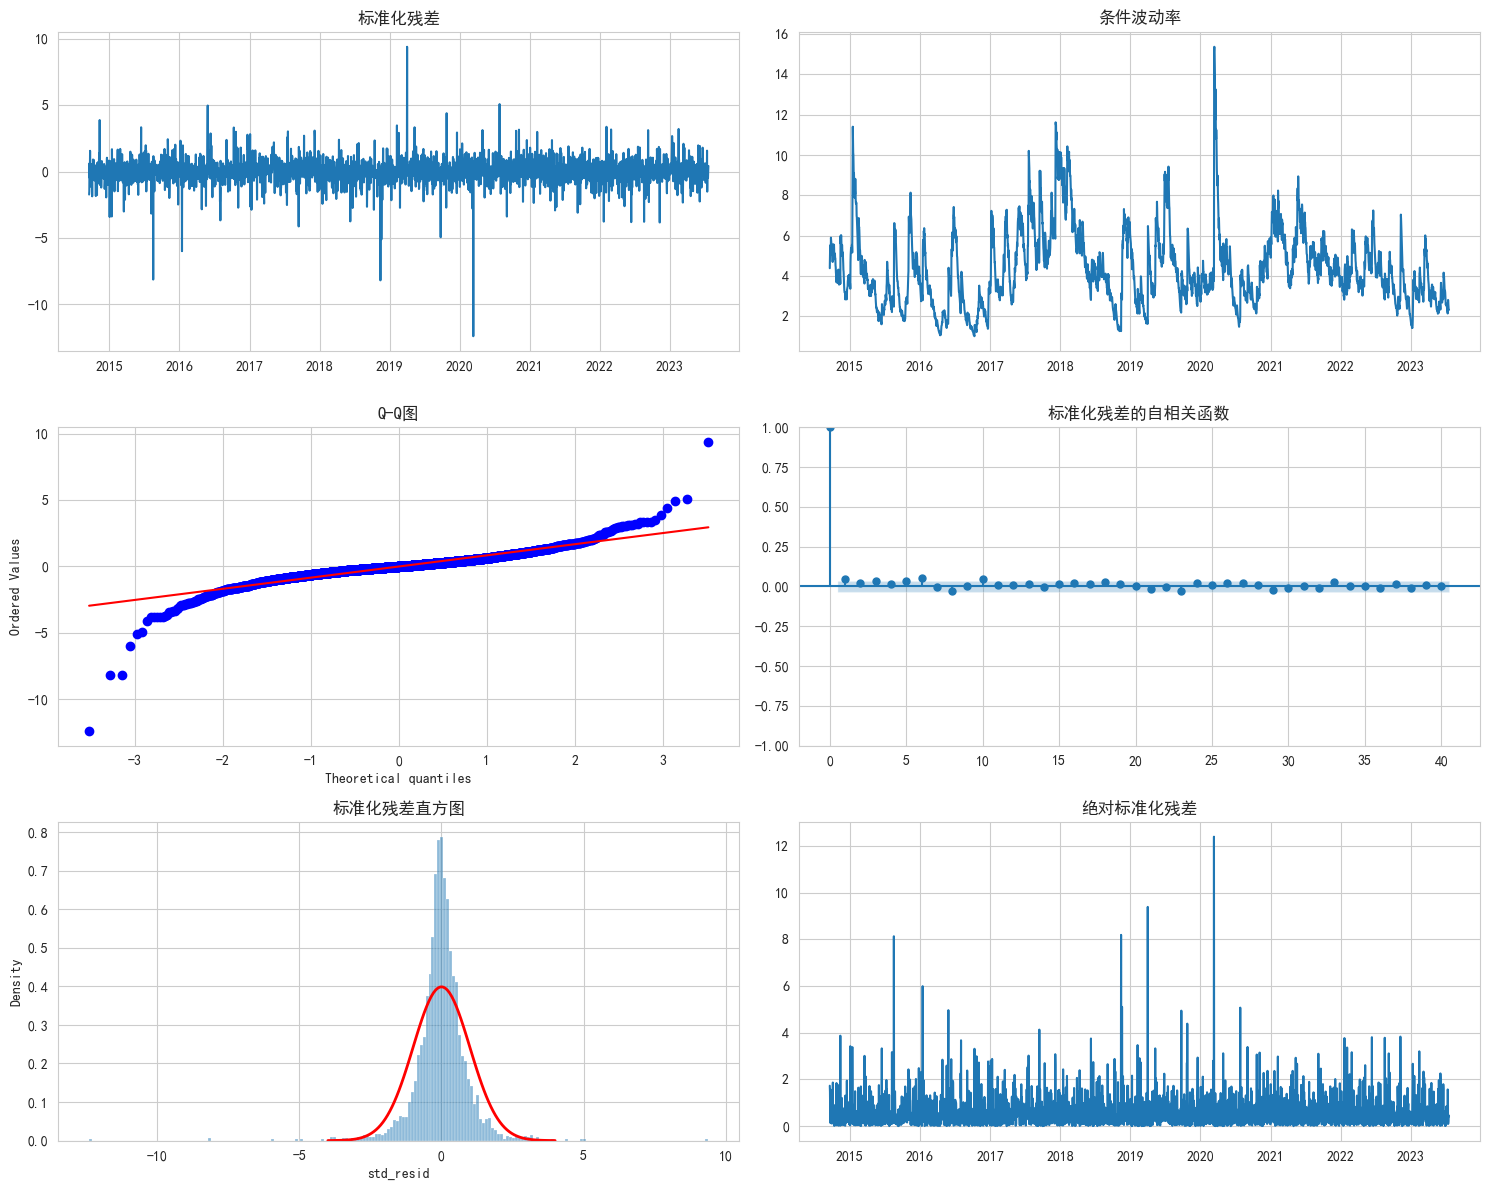


LSTM指标:
{'mse': np.float32(1486161.0), 'rmse': np.float32(1219.082), 'mae': np.float32(842.7319), 'mape': np.float32(2.6527023)}

EGARCH诊断结果:
{'ljung_box':       lb_stat  lb_pvalue
10  33.854843   0.000195
15  36.095850   0.001712
20  41.663652   0.003059, 'jarque_bera': {'statistic': np.float64(65511.26953082746), 'pvalue': np.float64(0.0)}, 'arch_effect': {'statistic': np.float64(4.701464546118197), 'pvalue': np.float64(0.9672144464377926)}}

绘制预测结果...


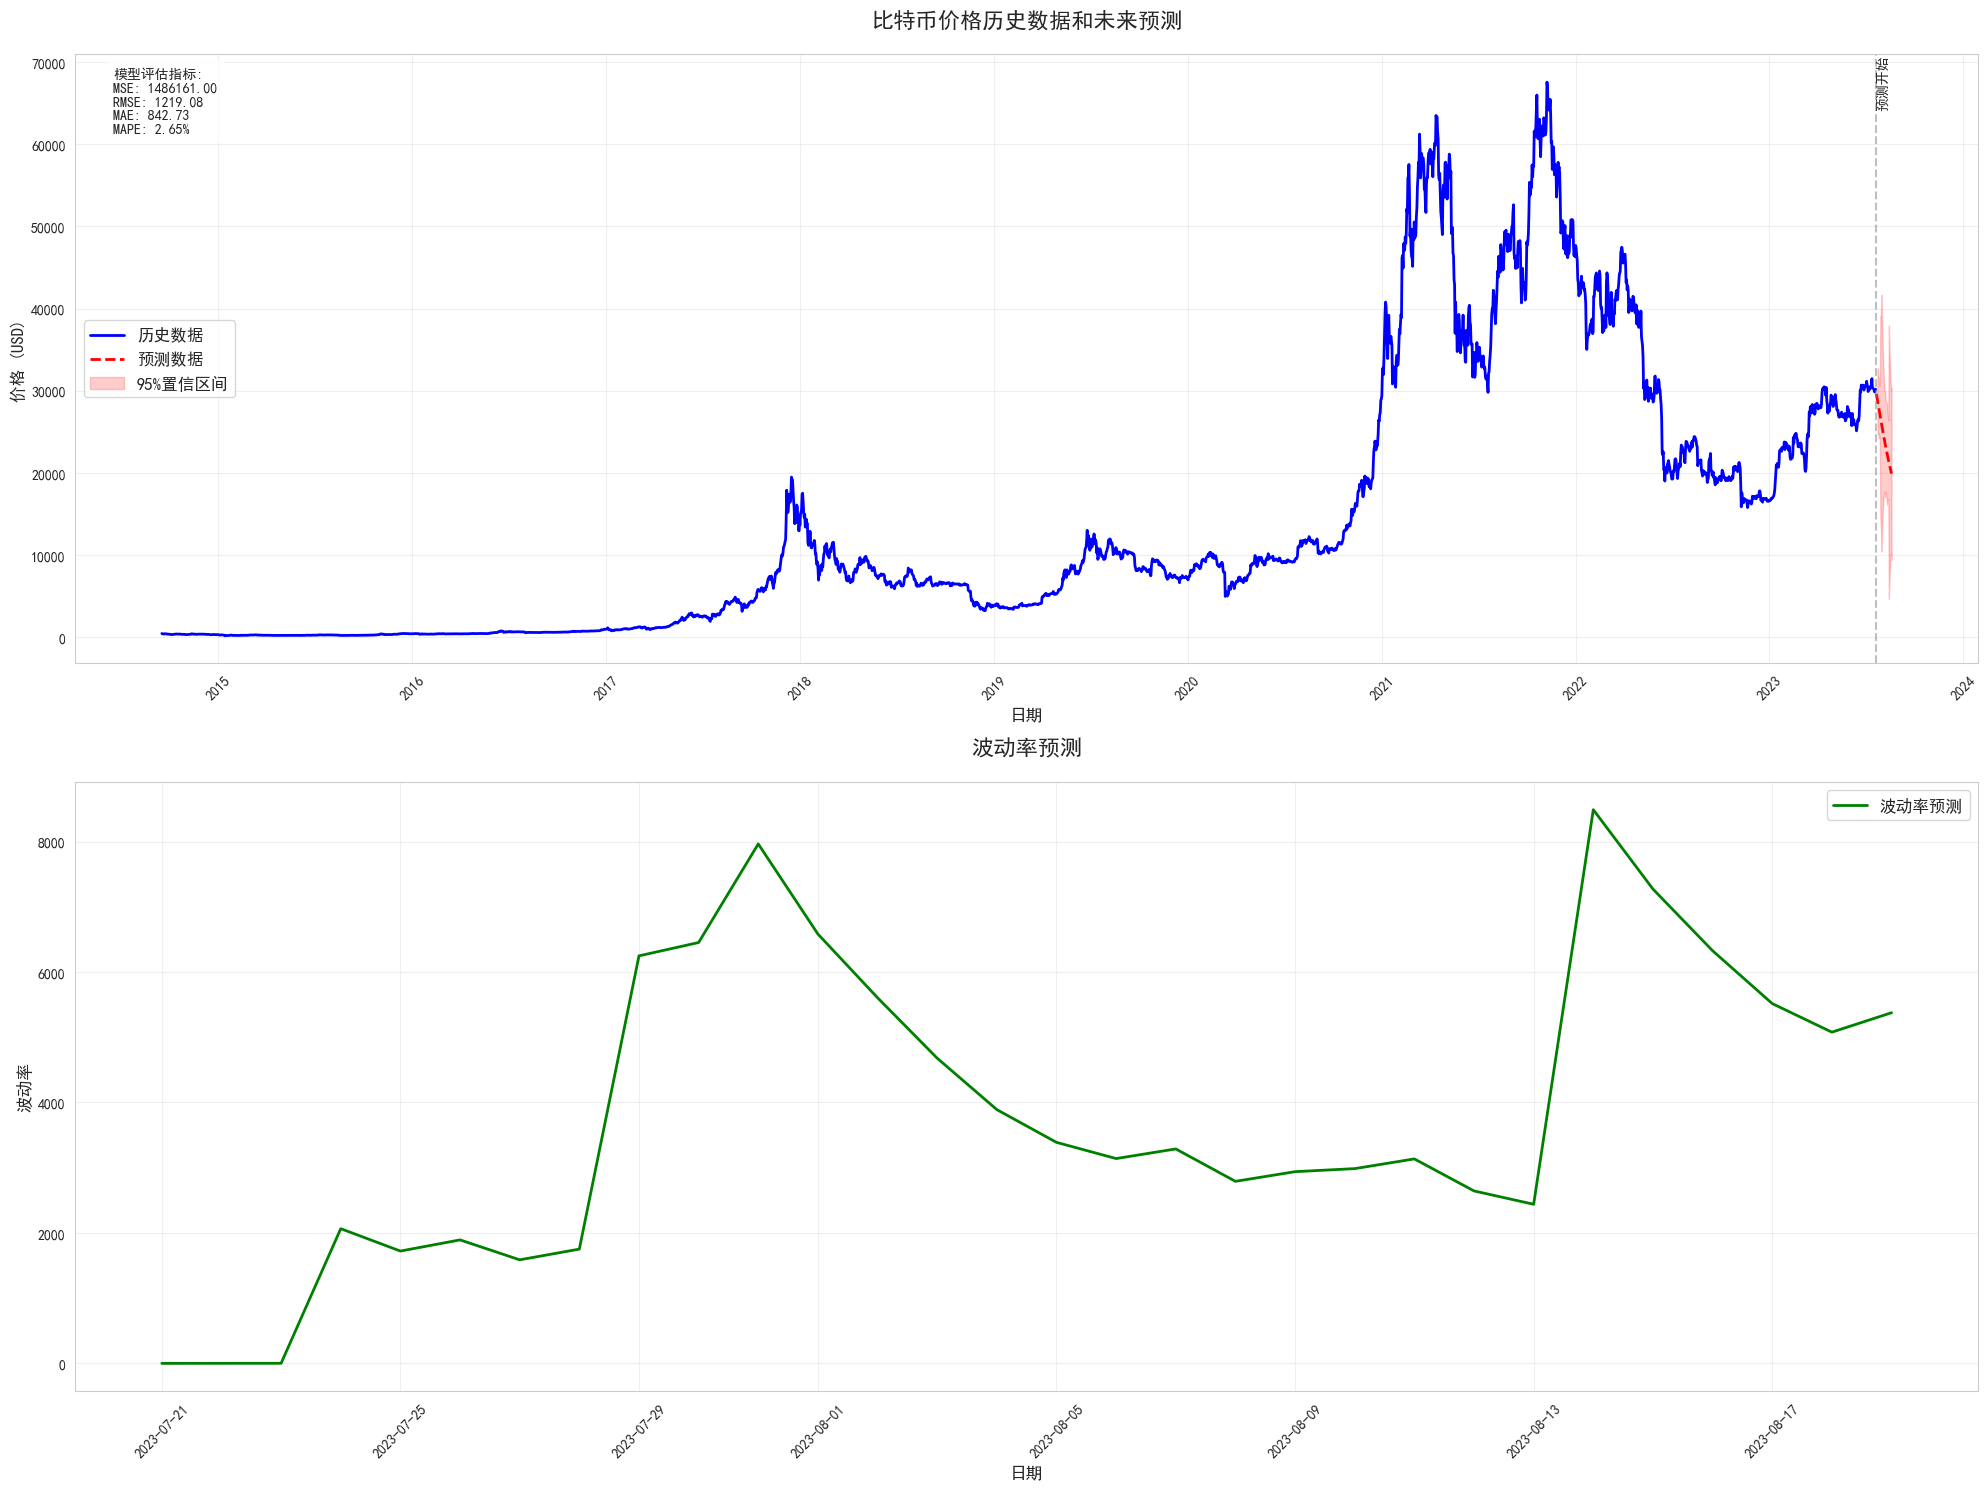


异方差检验结果:
ARCH效应检验统计量: 4.7015
p值: 0.9672
✓ 成功消除异方差性


In [1]:
import pandas as pd
import os
from btc_lstm_handler import BTCLSTMHandler
from btc_egarch_handler import BTCEGARCHHandler, BTCHybridHandler, train_and_evaluate_hybrid_model
from visualization import plot_complete_prediction

def main():
    # 加载数据
    print("加载数据...")
    df = pd.read_csv('data/BTC-USD.csv', index_col='Date', parse_dates=True)

    try:
        # 使用LSTM模型混合模型
        print("\n使用混合模型进行预测...")
        hybrid_handler, eval_results, hybrid_predictions = train_and_evaluate_hybrid_model(df)

        # 输出评估结果
        print("\nLSTM指标:")
        print(eval_results['lstm_metrics'])
        print("\nEGARCH诊断结果:")
        print(eval_results['egarch_diagnostics'])

        # 预测可视化
        future_dates = pd.date_range(
            start=df.index[-1] + pd.Timedelta(days=1),
            periods=30,
            freq='D'
        )

        # 绘制结果
        print("\n绘制预测结果...")
        plot_complete_prediction(
            df,
            future_dates,
            hybrid_predictions.mean,
            confidence_intervals=(hybrid_predictions.lower_bound, hybrid_predictions.upper_bound),
            metrics=eval_results['lstm_metrics'],
            volatility=hybrid_predictions.volatility
        )

        # 检查异方差
        arch_test = eval_results['egarch_diagnostics']['arch_effect']
        print("\n异方差检验结果:")
        print(f"ARCH效应检验统计量: {arch_test['statistic']:.4f}")
        print(f"p值: {arch_test['pvalue']:.4f}")

        if arch_test['pvalue'] > 0.05:
            print("✓ 成功消除异方差性")
        else:
            print("! 仍存在异方差性，可能需要调整模型参数")

    except Exception as e:
        print(f"运行过程中出现错误: {str(e)}")
        raise

if __name__ == "__main__":
    main()

正在加载数据...
初始化分析器...
正在进行数据预处理...

执行基础分析...

平稳性检验结果:

Close:
ADF统计量: -1.5404
p值: 0.5134
临界值:
	1%: -3.4324
	5%: -2.8624
	10%: -2.5673

Volume:
ADF统计量: -2.1898
p值: 0.2100
临界值:
	1%: -3.4324
	5%: -2.8624
	10%: -2.5673

绘制基础分析图...


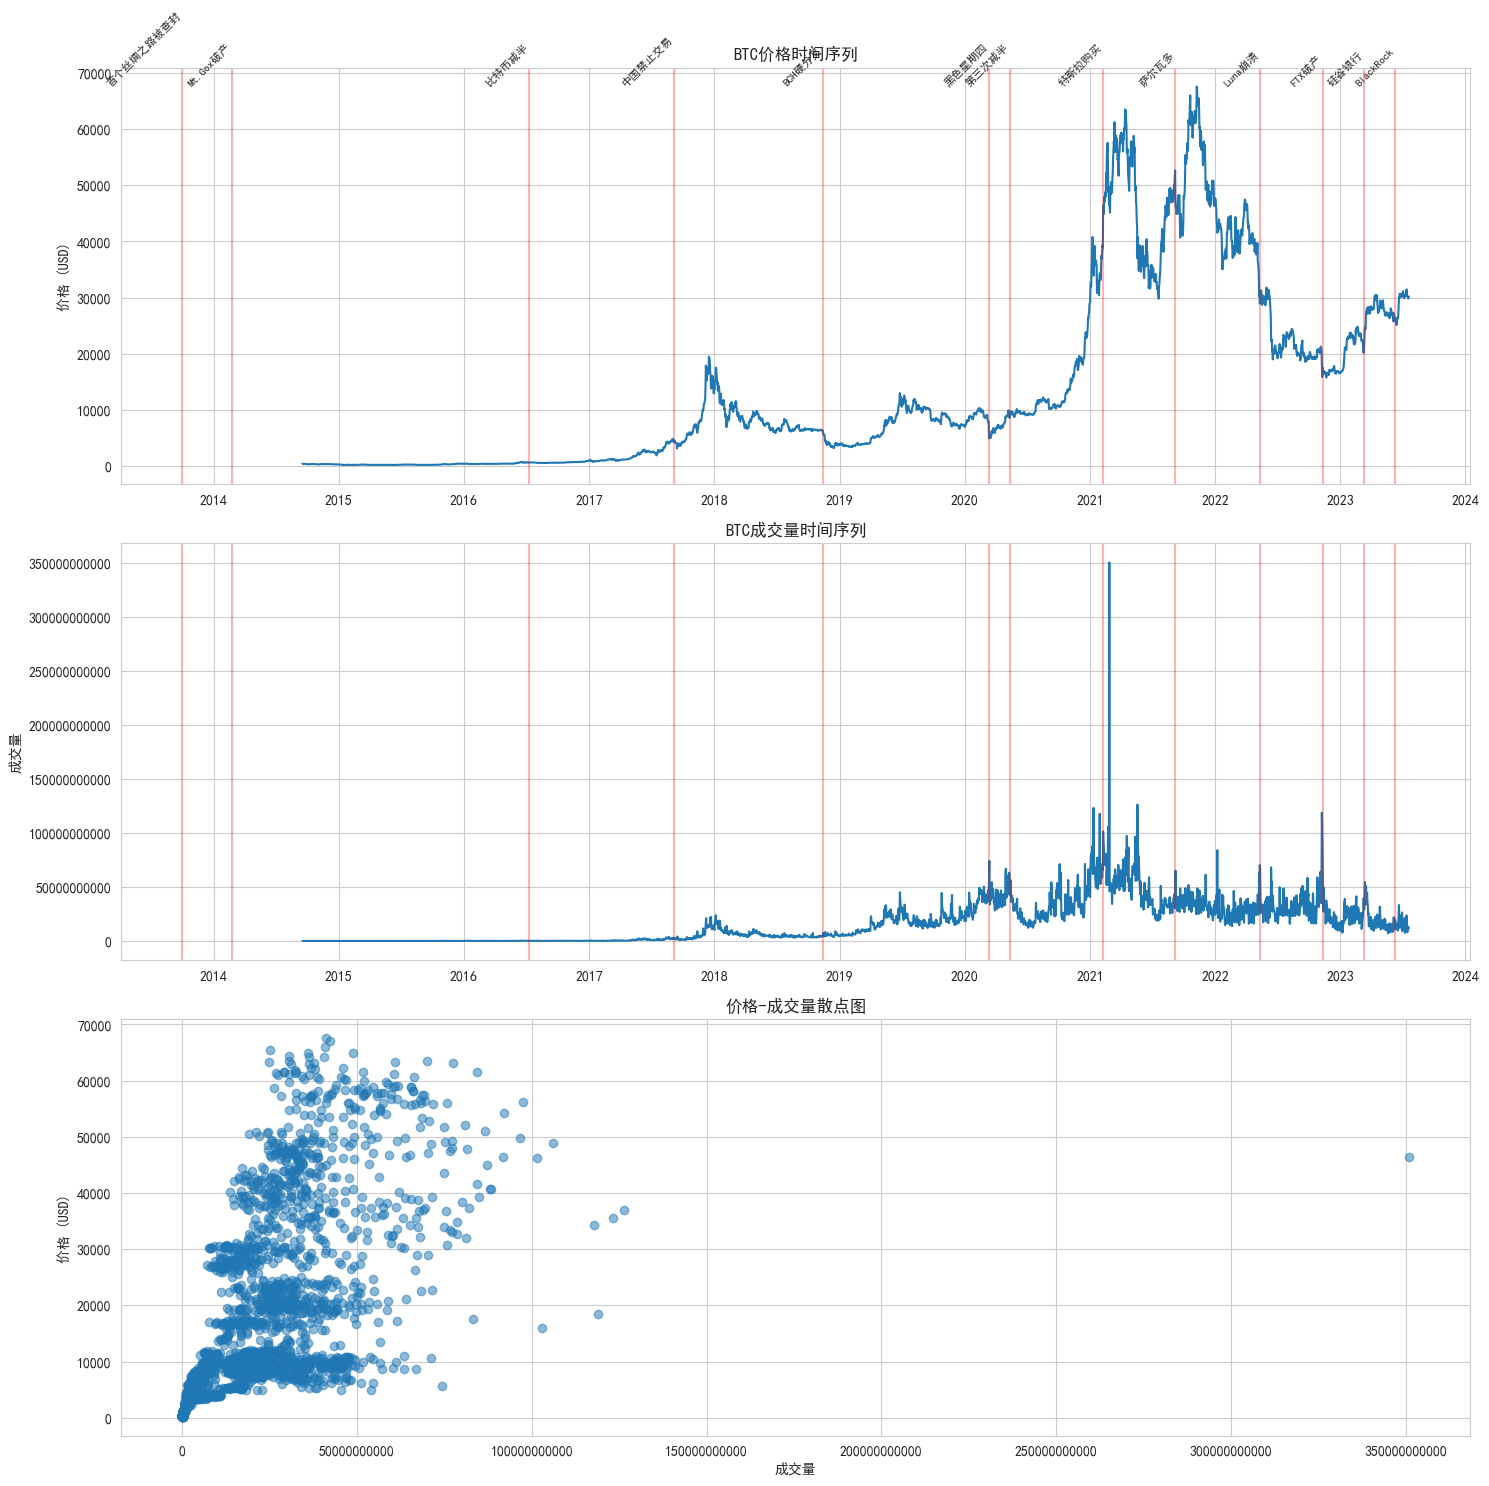


执行干预分析...

干预分析结果:

ARIMAX模型摘要:
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Volume          -4.894e-09   6.45e-10     -7.585      0.000   -6.16e-09   -3.63e-09
pulse_首个丝绸之路被查封    -0.0001         -0        inf      0.000      -0.000      -0.000
step_首个丝绸之路被查封      0.0001   9.07e-16   1.11e+11      0.000       0.000       0.000
decay_首个丝绸之路被查封    -0.0103         -0        inf      0.000      -0.010      -0.010
pulse_Mt.Gox破产      0.0007         -0       -inf      0.000       0.001       0.001
step_Mt.Gox破产       0.0043   9.07e-16   4.77e+12      0.000       0.004       0.004
decay_Mt.Gox破产      0.0098         -0       -inf      0.000       0.010       0.010
pulse_比特币减半        -0.0684        nan        nan        nan         nan         nan
step_比特币减半        -76.1571        nan        nan        nan         nan         nan
decay_比特币减半        60.8805   1.57e-14   3.8

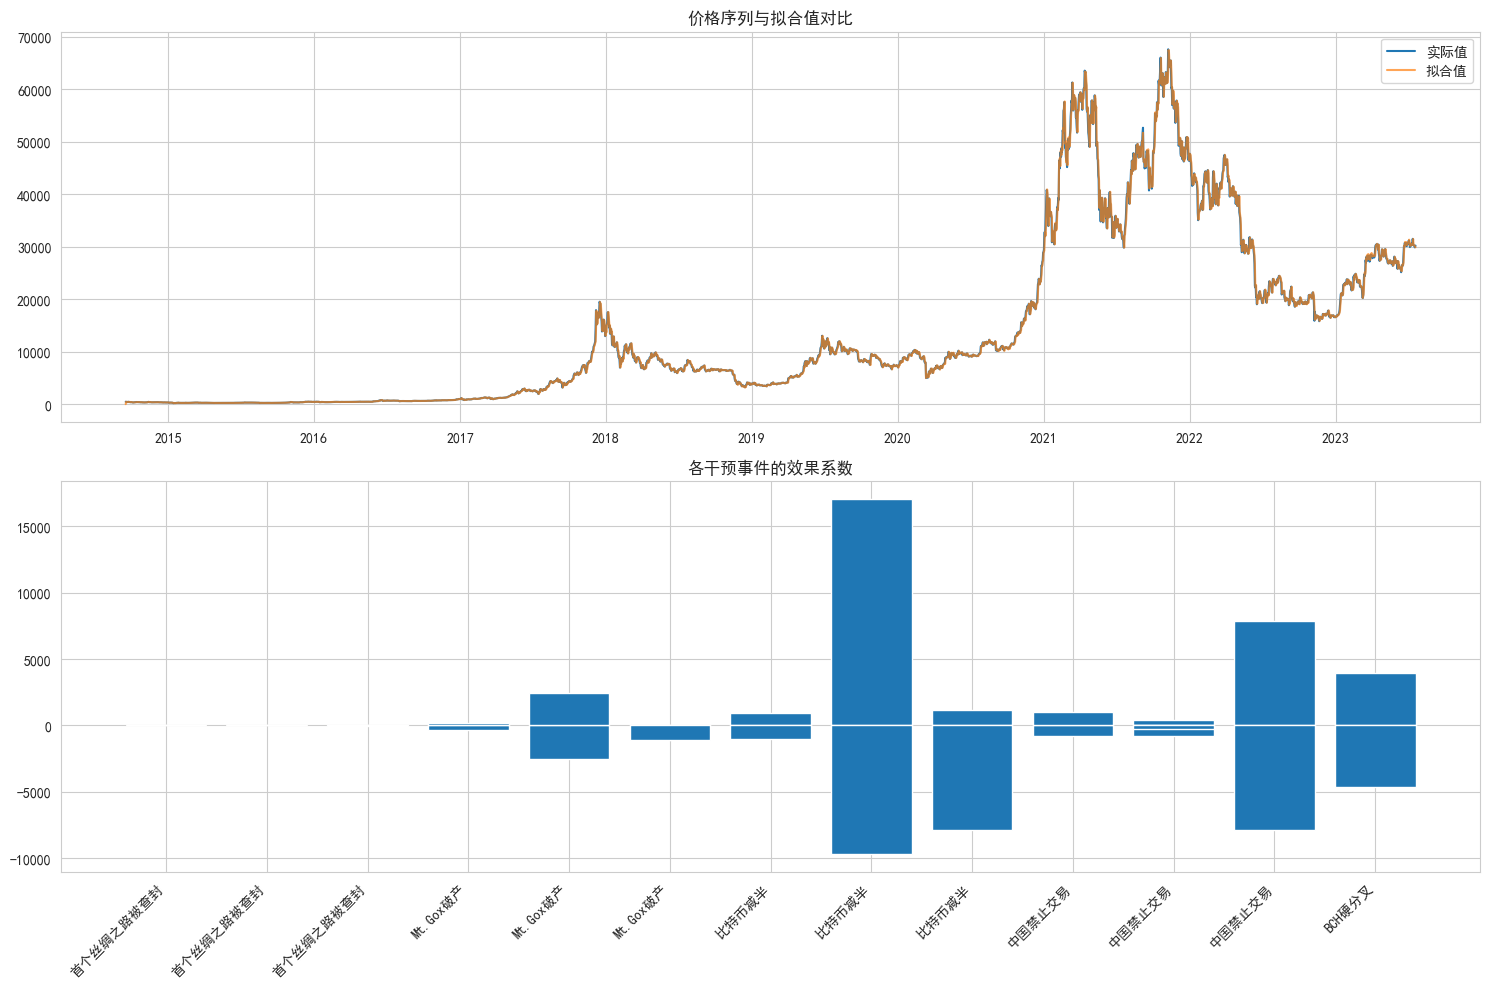


保存分析结果...

分析过程中出现错误: [Errno 2] No such file or directory: 'results\\btc_intervention_model.pkl'


In [1]:
import pandas as pd
from multivariate_analysis import BTCMultivariateAnalysis
from events import events
import warnings
warnings.filterwarnings('ignore')  # 忽略警告信息

def main():
    # 加载数据
    print("正在加载数据...")
    df = pd.read_csv('data/BTC-USD.csv', index_col='Date', parse_dates=True)

    # 初始化分析器
    print("初始化分析器...")
    analyzer = BTCMultivariateAnalysis(df, events)

    # 数据预处理
    print("正在进行数据预处理...")
    df_processed = analyzer.preprocess_data()

    # 基础分析
    print("\n执行基础分析...")

    # 1. 检查平稳性
    stationarity_results = analyzer.check_stationarity()
    print("\n平稳性检验结果:")
    for variable, results in stationarity_results.items():
        print(f"\n{variable}:")
        print(f"ADF统计量: {results['adf_statistic']:.4f}")
        print(f"p值: {results['p_value']:.4f}")
        print("临界值:")
        for key, value in results['critical_values'].items():
            print(f"\t{key}: {value:.4f}")

    # 2. 绘制初始分析图
    print("\n绘制基础分析图...")
    analyzer.plot_initial_analysis()

    # 3. 执行干预分析
    print("\n执行干预分析...")
    intervention_results = analyzer.intervention_analysis_with_arimax()

    # 4. 输出干预分析结果
    print("\n干预分析结果:")
    model = intervention_results['model']
    print("\nARIMAX模型摘要:")
    print(model.summary().tables[1])  # 只打印参数估计表

    print("\n重大事件影响分析:")
    effects = intervention_results['intervention_effects']
    for event, effect in effects.items():
        if abs(effect['p_value']) < 0.05:  # 只显示显著的事件
            event_name = event.split('_', 1)[1]  # 提取事件名称
            print(f"\n事件: {event_name}")
            print(f"影响系数: {effect['coefficient']:.4f}")
            print(f"显著性(p值): {effect['p_value']:.4f}")
            print(f"95%置信区间: [{effect['conf_int_lower']:.4f}, {effect['conf_int_upper']:.4f}]")

    # 5. 绘制干预效果图
    print("\n绘制干预效果分析图...")
    analyzer.plot_intervention_effects(intervention_results)

    # 6. 保存结果
    print("\n保存分析结果...")
    intervention_results['model'].save('results/btc_intervention_model.pkl')

    plt.show()  # 显示所有图形

if __name__ == "__main__":
    try:
        main()
        print("\n分析完成!")
    except Exception as e:
        print(f"\n分析过程中出现错误: {str(e)}")